In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Гиперпараметры нейронной сети
num_epochs = 5 #Количество эпох обучения
batch_size = 32 #Количество образцов данных, передаваемых в нейросеть за одну итерацию обучения
learning_rate = 0.001 #Скорость обучения, определяющий, насколько сильно веса нейросети будут обновляться в процессе обучения

In [2]:
# Генерация синтетических данных для обучения нейронной сети
def generate_data(num_samples, radius=2):
    x = np.random.uniform(-radius, radius, (num_samples, 2))
    y = np.exp(-np.sum(x**2, axis=1))
    return x, y

In [3]:
x_train_list, y_train_list = [], []
x_test_list, y_test_list = [], []

for _ in range(4):
    x_train, y_train = generate_data(10000)
    x_train_list.append(x_train)
    y_train_list.append(y_train)

    x_test, y_test = generate_data(1000)
    x_test_list.append(x_test)
    y_test_list.append(y_test)


In [4]:
# Создание модели нейронной сети
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4)  # 4 выходных нейрона для 4 датчиков
])

In [5]:
# Компиляция модели
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='mse')


In [6]:
# Обучение модели
for i in range(4):
    model.fit(x_train_list[i], y_train_list[i], epochs=num_epochs, batch_size=batch_size, validation_data=(x_test_list[i], y_test_list[i]))


Epoch 1/5
313/313 [==============================] - 2s 3ms/step - loss: 0.0231 - val_loss: 0.0015
Epoch 2/5
313/313 [==============================] - 1s 3ms/step - loss: 8.0379e-04 - val_loss: 3.5829e-04
Epoch 3/5
313/313 [==============================] - 1s 2ms/step - loss: 2.4866e-04 - val_loss: 1.6712e-04
Epoch 4/5
313/313 [==============================] - 1s 2ms/step - loss: 1.3153e-04 - val_loss: 1.1201e-04
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 8.5996e-05 - val_loss: 7.7694e-05
Epoch 1/5
313/313 [==============================] - 1s 3ms/step - loss: 6.6290e-05 - val_loss: 5.5171e-05
Epoch 2/5
313/313 [==============================] - 1s 2ms/step - loss: 5.1840e-05 - val_loss: 3.7773e-05
Epoch 3/5
313/313 [==============================] - 1s 2ms/step - loss: 4.2991e-05 - val_loss: 4.0799e-05
Epoch 4/5
313/313 [==============================] - 1s 3ms/step - loss: 3.7910e-05 - val_loss: 3.2542e-05
Epoch 5/5
313/313 [==========================

In [7]:
# Визуализация данных
def visualize_data(x, y, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis')
    plt.colorbar(label='CO2 Concentration')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


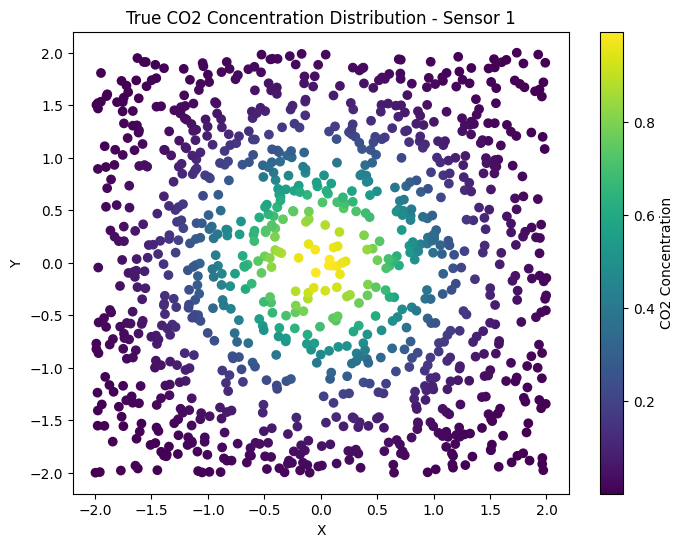

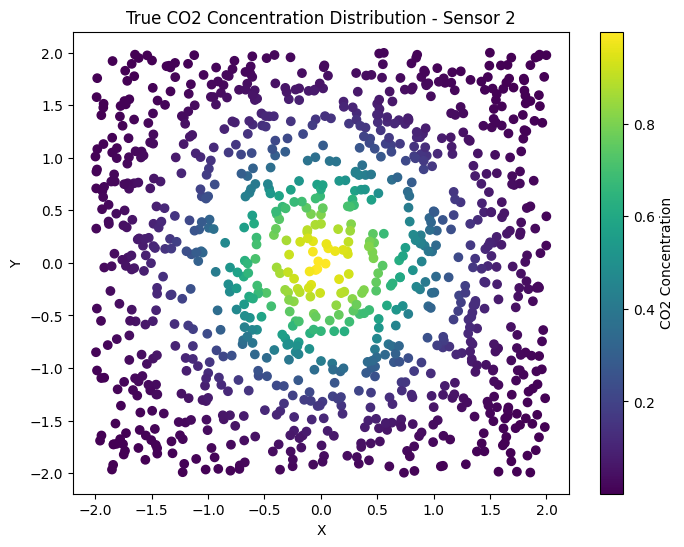

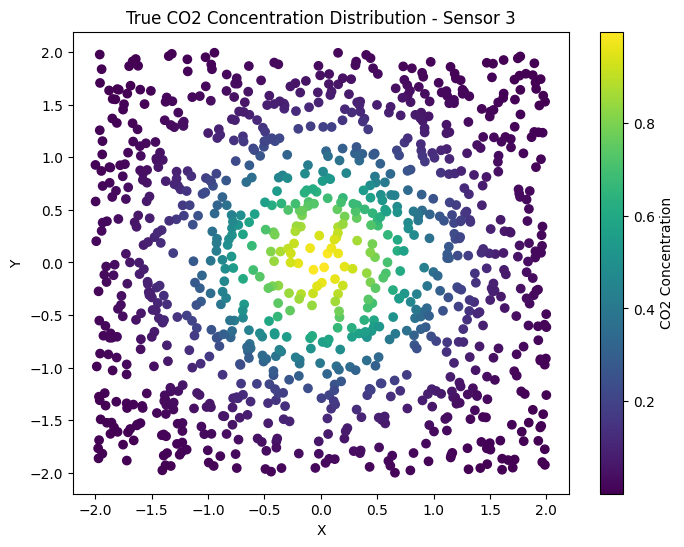

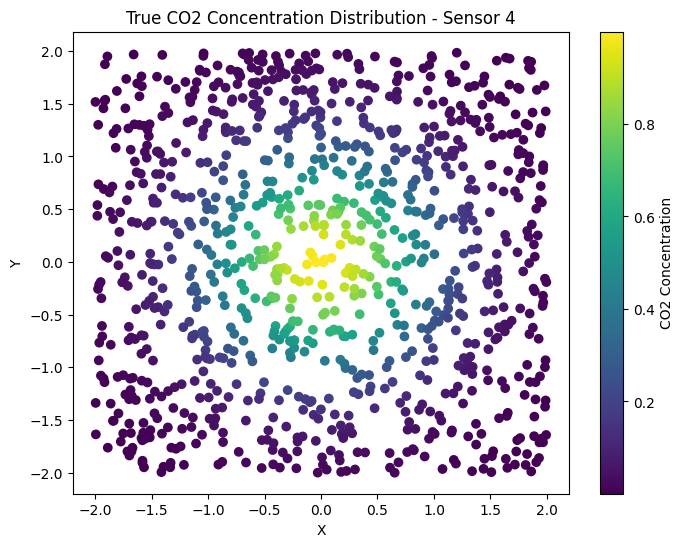

In [8]:
# Визуализация распределения концентрации CO2 в помещении для каждого датчика
for i in range(4):
    x_vis, y_vis = generate_data(1000)
    visualize_data(x_vis, y_vis, f'True CO2 Concentration Distribution - Sensor {i+1}')

In [10]:
# Генерация точек в слепых зонах датчиков для прогнозирования
def generate_blind_zone_points(num_points, radius=6):
    x = np.random.uniform(-radius, radius, (num_points, 2))
    return x

In [11]:
blind_zone_points = generate_blind_zone_points(2000)

# Прогнозирование концентрации CO2 в слепых зонах датчиков с помощью нейронной сети
predicted_concentration = model.predict(blind_zone_points)

63/63 [==============================] - 0s 2ms/step


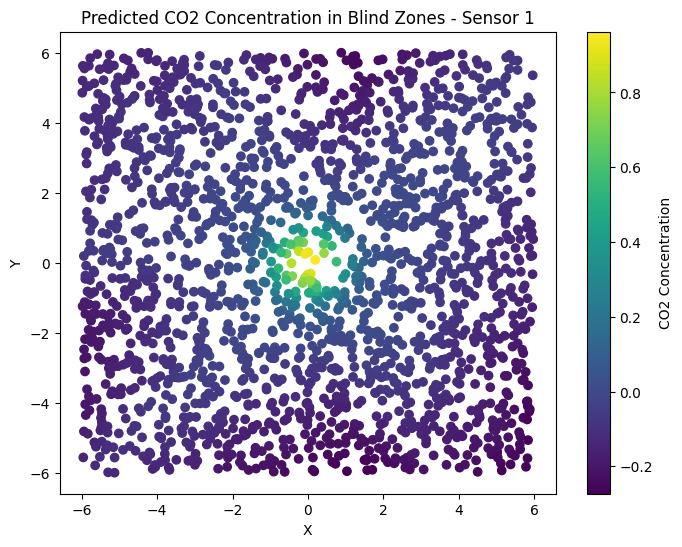

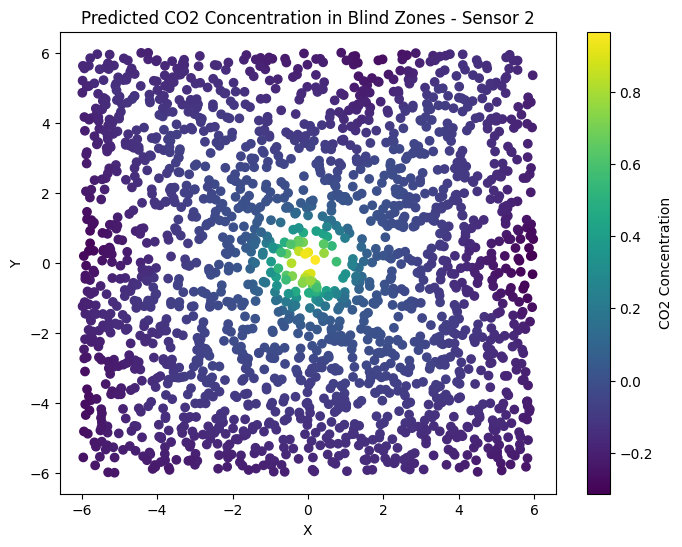

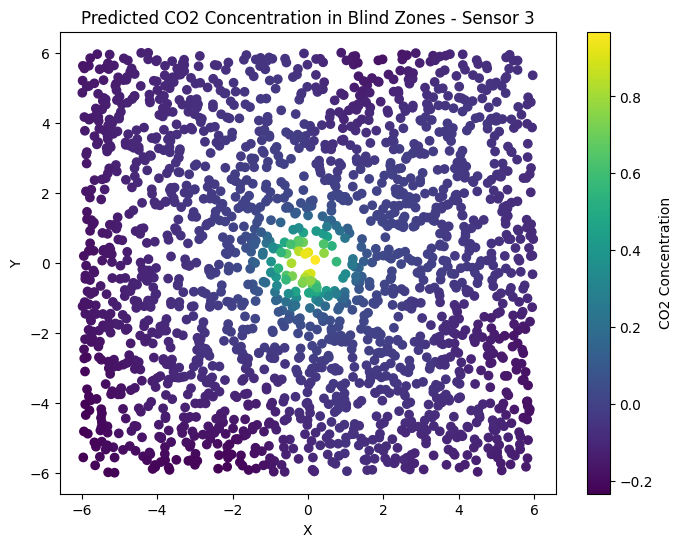

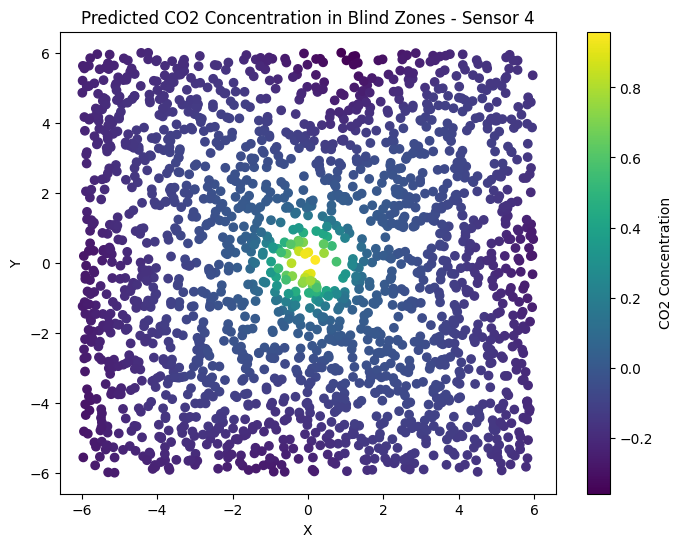

In [12]:
# Визуализация прогнозируемой концентрации CO2 в слепых зонах для каждого датчика
for i in range(4):
    visualize_data(blind_zone_points, predicted_concentration[:, i], f'Predicted CO2 Concentration in Blind Zones - Sensor {i+1}')

Входной слой:

На вход нейронной сети подаются два признака (координаты точки) для каждого образца данных. В этом случае размерность входного слоя равна (2,), что соответствует двум входным признакам.

Скрытые слои:

Сеть имеет два полносвязных скрытых слоя, каждый из которых содержит 64 нейрона. Эти слои используют функцию активации ReLU (Rectified Linear Unit), которая добавляет нелинейность в сеть, помогая ей изучать сложные зависимости в данных.

Выходной слой:

Выходной слой содержит 4 нейрона, по одному для каждого датчика. Эти нейроны выдают прогнозы о концентрации CO2 для соответствующих датчиков.

Функция потерь:

В качестве функции потерь используется среднеквадратичная ошибка (MSE), которая измеряет разницу между прогнозами модели и истинными значениями меток.

Оптимизатор:

Мы используем оптимизатор Adam с заданным коэффициентом обучения (learning rate) для обучения модели. Оптимизатор Adam эффективно обновляет веса сети, основываясь на градиентах функции потерь.

Обучение:

Для обучения модели мы используем обучающие данные, сгенерированные функцией generate_data. Модель обучается на этих данных в течение нескольких эпох с заданным размером пакета (batch size). В каждой эпохе модель пытается минимизировать функцию потерь, подстраивая веса нейронов.

Визуализация:

После обучения модели мы визуализируем данные, чтобы оценить ее производительность. Мы генерируем данные для каждого датчика и отображаем их распределение в виде точечного графика, а также визуализируем прогнозы модели для слепых зон.